In [1]:
from neurapprox.NeuralNet import NeuralNet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
from sklearn.preprocessing import StandardScaler
import time
# plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')
# %matplotlib inline
# matplotlib.use('nbagg')
# %matplotlib notebook
# %matplotlib qt 

In [2]:
wdir = "data/"
file = "AT.dat"

# Data: $k$, $r$, $x$, $A(k,r, x)$

In [3]:
data = np.loadtxt(wdir+file)

In [4]:
vec = data[:, :3]
afn = data[:, 3]
# scaler_r = StandardScaler()
# scaler_r.fit(vec[:, 1].reshape(-1,1))
# scaler_r.fit(vec)
# vec[:, 1] = scaler_r.transform(vec[:, 1].reshape(-1,1)).reshape(-1,)
# vec[:, 1] = vec[:, 1]/10000
# vec = scaler_r.transform(vec)
len(afn), np.shape(vec), np.shape(data)

(8556, (8556, 3), (8556, 4))

Text(0.5, 1.0, '$A(k, r, x)$')

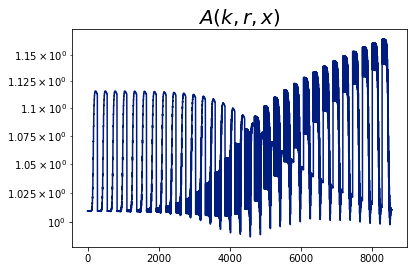

In [5]:
plt.plot(afn)
plt.yscale('log')
plt.title('$A(k, r, x)$', fontsize=20)

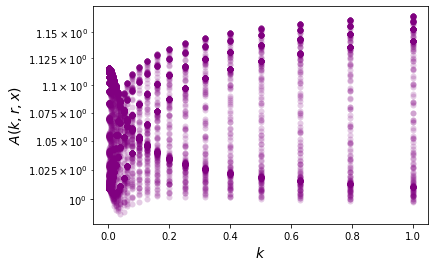

In [6]:
plt.scatter(vec[:,0], afn, linewidth=1e-5, alpha=0.2, c='purple')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$A(k,r,x)$', fontsize=14)
plt.yscale('log')

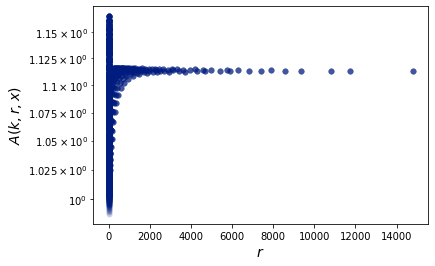

In [7]:
plt.scatter(vec[:,1], afn, linewidth=1e-7, alpha=0.2)
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
plt.yscale('log')

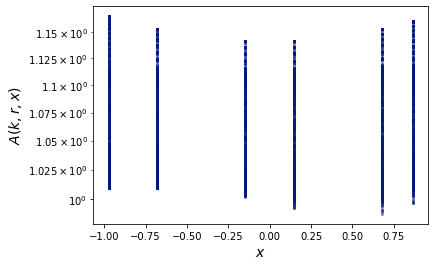

In [8]:
plt.scatter(vec[:,2], afn, marker='.', linewidth=1e-4, alpha=0.5)
plt.xlabel('$x$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
plt.yscale('log')

Text(0, 0.5, '$r$')

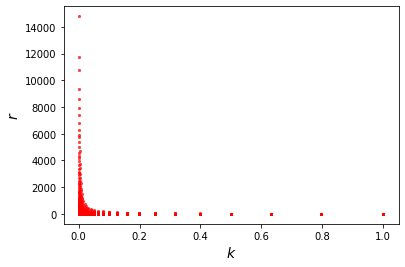

In [9]:
plt.scatter(vec[:,0], vec[:,1], marker='.', linewidth=1e-5, alpha=0.2, c='r')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
# plt.yscale('log')
# plt.xscale('log')

Text(0, 0.5, '$x$')

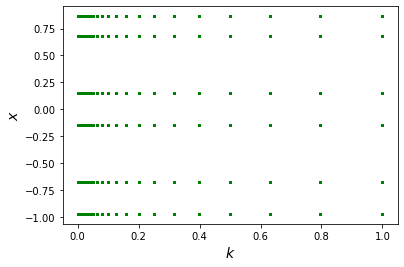

In [10]:
plt.scatter(vec[:,0], vec[:,2], marker='.', linewidth=1e-5, alpha=0.2, c='g')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$x$', fontsize=14)

Text(0, 0.5, '$x$')

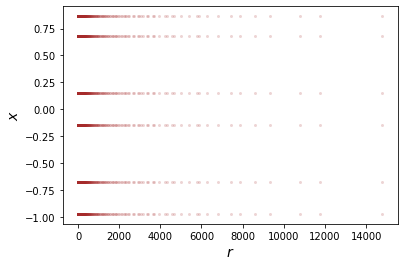

In [11]:
plt.scatter(vec[:, 1], vec[:,2], marker='.', linewidth=1e-5, alpha=0.2, c='brown')
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$x$', fontsize=14)
# plt.xscale('log')

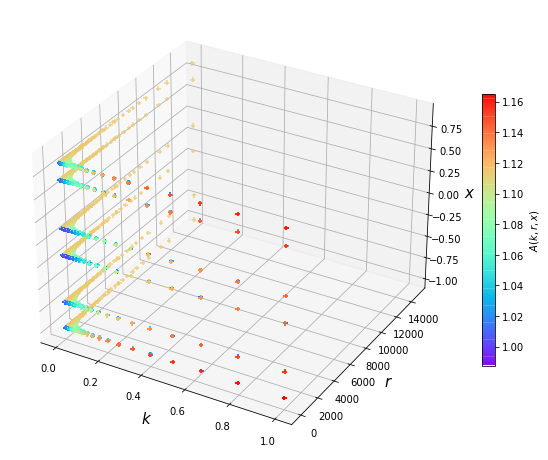

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(vec[:,0], vec[:,1], vec[:,2], marker='+', c=afn, cmap='rainbow', alpha=0.8)
ax.set_xlabel('$k$', fontsize=15)
ax.set_ylabel('$r$', fontsize=15)
ax.set_zlabel('$x$', fontsize=15)
plt.colorbar(p, shrink=0.5, label='$A(k, r, x)$')

In [13]:
# network = NeuralNet(samples, likes, [3, 100,100,1], epochs=200, batch_size=32,\
#                     learrning_rate=1e-5)
# funciona bien para 50mil muestras

In [14]:
network = NeuralNet(load=True, model_path='models/a_function.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 20,701
Trainable params: 20,701
Non-trainable params: 0
_________________________________________________________________


In [15]:
# network = NeuralNet(X=vec, Y=afn, topology=[3, 100, 100, 100, 1], epochs=200, batch_size=32,\
#                     learrning_rate=1e-4)
# Grid suggestion:
# network = NeuralNet(X=vec, Y=afn, topology=[3, 50, 150, 50, 1], epochs=100, batch_size=4,\
#                     learrning_rate=1e-4)

# network.train()

In [16]:
# network.train()

In [17]:
# network.plot(ylogscale=True)

# Checking predictions

In [18]:
r = np.random.randint(len(afn)-1)
# r = np.argmin(likes)
test_sample = vec[r]

new_vector = np.array(test_sample).reshape(1,3)
# new_vector = np.array([0.7,0.5,0.5])
t1 = time.time()
prediction = network.predict(new_vector)
tf = time.time() - t1

print("Predicción: {}, time: {:.5f} seconds".format(float(prediction), tf))

Predicción: 1.0238035917282104, time: 0.08444 seconds


In [19]:
print("Real: {:.4f}, Predicción: {:.4f}, Diff: {:4f}".format(afn[r], float(prediction), np.abs(afn[r]- float(prediction))))

Real: 1.0074, Predicción: 1.0238, Diff: 0.016415


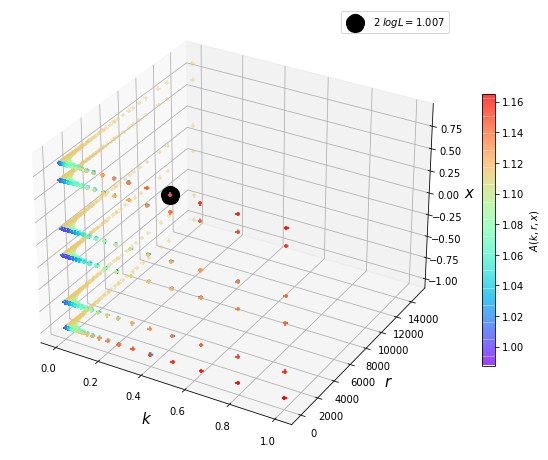

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(vec[:,0],vec[:,1], vec[:,2], marker='+', c=afn, cmap='rainbow', alpha=0.5)
ax.set_xlabel('$k$', fontsize=15)
ax.set_ylabel('$r$', fontsize=15)
ax.set_zlabel('$x$', fontsize=15)
plt.colorbar(p, shrink=0.5, label='$A(k, r, x)$')
# plt.colorbar(p,shrink=0.5, label='$2\;logL$')
ax.scatter(vec[r][0], vec[r][1], vec[r][2], marker='*', linewidth=15, c='black',\
           alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

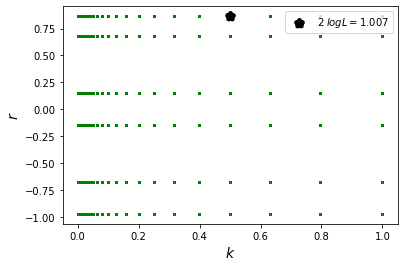

In [21]:
plt.scatter(vec[:,0], vec[:,2], marker='.', linewidth=1e-5, alpha=0.5, c='g')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
plt.scatter(vec[r][0], vec[r][2], marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

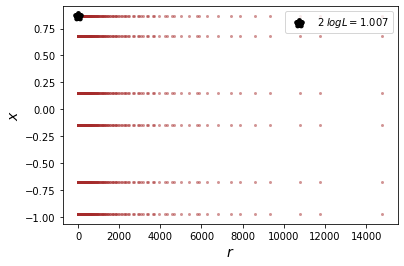

In [22]:
plt.scatter(vec[:,1],vec[:,2], marker='.', linewidth=1e-5, alpha=0.5, c='brown')
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$x$', fontsize=14)
# plt.xscale('log')
plt.scatter(vec[r][1], vec[r][2],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

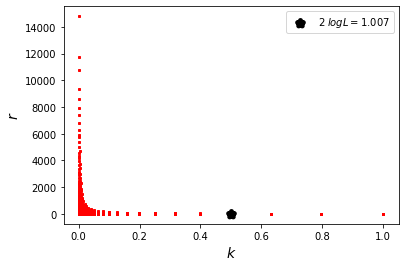

In [23]:
plt.scatter(vec[:,0],vec[:,1], marker='.', linewidth=1e-5, alpha=0.5, c='r')
plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(vec[r][0], vec[r][1],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(afn[r]))
plt.legend()

# Predictions of all the dataset

In [24]:
ti1 = time.time()
predictions = network.predict(vec)
tf1 = time.time() - ti1
print(tf1)

0.11475205421447754


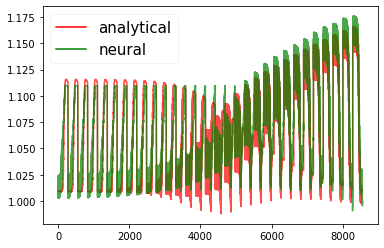

In [25]:
plt.plot(afn, alpha=0.7, label='analytical', c='red')
plt.plot(predictions, alpha=0.7, label='neural', c='green')
# plt.yscale('log')
# plt.xlim(50000,100000)
leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

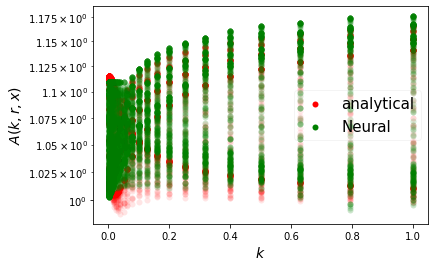

In [26]:
plt.scatter(vec[:,0], afn, linewidth=1e-5, alpha=0.1, c='red', label='analytical')
plt.scatter(vec[:,0], predictions, linewidth=1e-5, alpha=0.2, c='green', label='Neural')

plt.xlabel('$k$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

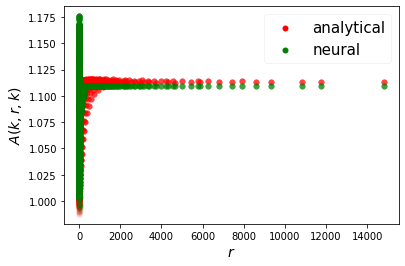

In [27]:
plt.scatter(vec[:,1], afn, linewidth=1e-7, alpha=0.2, marker='o', c='red', label='analytical')
plt.scatter(vec[:,1], predictions, linewidth=1e-7, alpha=0.2, marker='o', c='green', label='neural')
plt.xlabel('$r$', fontsize=14)
plt.ylabel(r'$A(k, r, k)$', fontsize=14)
# plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

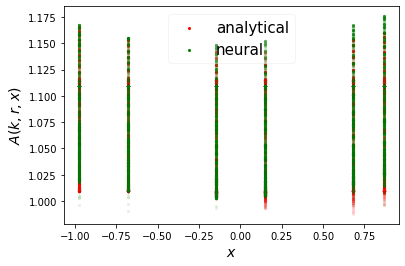

In [28]:
plt.scatter(vec[:,2], afn, marker='.', linewidth=1e-1, alpha=0.1, label='analytical', c='red')
plt.scatter(vec[:,2], predictions, marker='.', linewidth=1e-1, alpha=0.1, c='green', label='neural')
plt.xlabel('$x$', fontsize=14)
plt.ylabel(r'$A(k, r, x)$', fontsize=14)
# plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [29]:
# network.save_model('models/a_function.h5')

## Saving percentages in a fift column  $ (A- A_{predicted})/A$

In [41]:
pred = predictions.reshape(len(vec),)
perc = (afn - pred)/afn
perc = perc.reshape(len(vec),1)
np.shape(avg)
print('Max |(A-App)/A|: {}'.format(np.max(np.abs(perc))))
print('Min |(A-App)/A|: {}'.format(np.min(np.abs(perc))))
print('Mean |(A-App)/A|: {}'.format(np.mean(np.abs(perc))))
# for i in range(len(vec)):
#     print(afn[i], pred[i], avg[i])
#     print(avg[i] == (afn[i]-pred[i])/afn[i])

Max |(A-App)/A|: 0.053335086848095195
Min |(A-App)/A|: 1.2117413535277249e-05
Mean |(A-App)/A|: 0.011454973706371385


In [42]:
percdata = np.concatenate((data, predictions), axis=1)
percdata = np.concatenate((percdata, perc), axis=1)
print(np.shape(avgdata))
np.savetxt('data/AT_perc.dat', avgdata, delimiter=' ',\
           header='# k, r, x, A[k,r,x], App, (A-App)/A ### {} predictions in {:.5f} seconds'.format(len(vec), tf1),
           fmt='%1.18f')

(8556, 6)


# Time of several predictions

In [32]:
print(np.shape(vec))
t1 = time.time()
prediction = network.predict(vec)
tf = time.time() - t1
print("{} predictions in {:.5f} seconds using directly predict".format(len(vec), tf))

(8556, 3)
8556 predictions in 0.09166 seconds using directly predict


In [56]:
t1 = time.time()
for v in vec:
    prediction = network.predict(np.array(v).reshape(1,3))
tf = time.time() - t1
print("{} predictions in {:.5f} seconds with for loop".format(len(vec), tf))

8556 predictions in 170.63356 seconds with for loop


## Predictions of unseen values

In [33]:
new_file = 'AT_All_krx.dat'
new_data = np.loadtxt(wdir+new_file)
new_data_f1 = new_data[np.where(new_data[:, 1] < np.max(data[:, 1]))]
new_data_f2 = new_data_f1[np.where(new_data_f1[:, 2] < np.max(data[:, 2]))]
# new_data[:, 2] = new_data[:, 1] < np.max(data[:, 2])
np.shape(new_data), np.shape(new_data_f1), np.shape(new_data_f2)

((220220, 4), (220190, 4), (176152, 4))

In [34]:
new_vec = new_data_f2[:, :3]
print(np.shape(new_vec))
t1 = time.time()
new_predictions = network.predict(new_vec)
# np.array(list(self.M(self.function, samples_grid)))
tf = time.time() - t1
print("{} predictions in {:.5f} seconds with keras predict function".format(len(new_vec), tf))
# np.shape(new_predictions)

(176152, 3)
176152 predictions in 1.04510 seconds with keras predict function


In [35]:
print("Average time per prediction: {:f} seconds".format(tf/len(new_vec)))

Average time per prediction: 0.000006 seconds


In [36]:
joindata = np.concatenate((new_vec, new_predictions), axis=1)
print(np.shape(joindata))

(176152, 4)


In [37]:
# fmt = '%1.3', '%1.18f', '%1.18f', '%1.1f'
np.savetxt('data/afn_predictions.dat', joindata, delimiter=' ',\
           header='# k, r, x, A[k,r,x] ### {} predictions in {:.5f} seconds'.format(len(new_vec), tf),
           fmt='%1.18f')

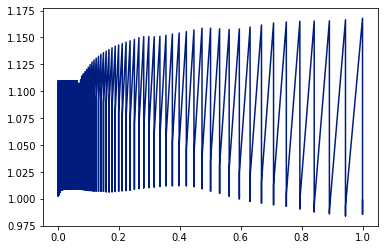

In [38]:
plt.plot(new_vec[:,0], new_predictions)
# plt.plot(afn)

## Consistency between unseen dataset and training dataset

In [39]:
print("k: \n\tTraining set: min = {}, max = {}\n\tAll dataset: min={}, max={}".format(np.min(vec[:,0]),\
                                                                                   np.max(vec[:,0]),\
                                                                                   np.min(new_vec[:,0]),
                                                                                   np.max(new_vec[:,0])))
print("r: \n\tTraining set: min = {}, max = {}\n\tAll dataset: min={}, max={}".format(np.min(vec[:,1]),\
                                                                                   np.max(vec[:,1]),\
                                                                                   np.min(new_vec[:,1]),
                                                                                   np.max(new_vec[:,1])))
print("x: \n\tTraining set: min = {}, max = {}\n\tAll dataset: min={}, max={}".format(np.min(vec[:,2]),\
                                                                                   np.max(vec[:,2]),\
                                                                                   np.min(new_vec[:,2]),
                                                                                   np.max(new_vec[:,2])))

k: 
	Training set: min = 0.001, max = 1.0
	All dataset: min=0.001, max=1.0
r: 
	Training set: min = 1.0816545247079513e-05, max = 14792.153718693195
	All dataset: min=1.0816545247079513e-05, max=14260.015010139972
x: 
	Training set: min = -0.9739065285171717, max = 0.8650633666889846
	All dataset: min=-0.9739065285171717, max=0.6794095682990244
